# Longitud media umbral
# Description

Si representamos Lg frente a Lp, para las ~7000 especies de las que tenemos datos de genes y proteínas cruzadas (Figura 6), vemos que hasta un valor umbral Lg = Lc, la longitud media de los genes es 3 veces más grande que la de las proteínas (y si representamos las varianzas hasta un valor Var_g=Var_c, la varianza de los genes es 9 veces mayor). Las distribuciones están simplemente escaladas.

### Modules

In [1]:
import os
import pandas as pd
#import plotnine as p9
from plotnine import *

### Data

In [2]:
# data file
system = list(os.uname())[0]
if system == 'Linux':
    merged_6521_file = "/media/emuro/Wes/"
elif system == 'Darwin':
    pass # Fix this!
merged_6521_file = merged_6521_file + "results/geneLength/outputInputFiles/analysis/some_statistics/stat_description/taxid_merged/"
merged_6521_file = merged_6521_file + "stat_description.taxid_merged.ensembl_and_ref_proteome.tsv"
print(merged_6521_file)

# retrieve data
merged = pd.read_csv(merged_6521_file, sep="\t")
merged.rename(columns = {"merged_division_superregnum" : 'Clades'}, inplace = True)

# visualize data
pd.set_option('display.max_columns', None)
merged

/media/emuro/Wes/results/geneLength/outputInputFiles/analysis/some_statistics/stat_description/taxid_merged/stat_description.taxid_merged.ensembl_and_ref_proteome.tsv


,genes_species,genes_assembly,genes_trunk_genes_path,genes_genes_file,genes_count,genes_mean,genes_std,genes_var,genes_min,genes_25perc,genes_50perc,genes_75perc,genes_max,genes_log10_mean,genes_log10_std,genes_log10_var,genes_log10_min,genes_log10_25perc,genes_log10_50perc,genes_log10_75perc,genes_log10_max,genes_log_mean,genes_log_std,genes_log_var,genes_log_min,genes_log_25perc,genes_log_50perc,genes_log_75perc,genes_log_max,genes_division,tax_id,prots_species,prots_proteome_id,prots_superregnum,prots_num_prot_cod_genes,prots_uniprot_fasta_file,prots_count,prots_mean,prots_std,prots_var,prots_min,prots_25perc,prots_50perc,prots_75perc,prots_max,prots_log10_mean,prots_log10_std,prots_log10_var,prots_log10_min,prots_log10_25perc,prots_log10_50perc,prots_log10_75perc,prots_log10_max,prots_log_mean,prots_log_std,prots_log_var,prots_log_min,prots_log_25perc,prots_log_50perc,prots_log_75perc,prots_log_max,Clades,ratio_mean_prots_genes,diff_prots_genes,abs_diff,ratio_prots_genes
0,archangium_gephyra_gca_001027285,ASM102728v1,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.archangium_gephyra_gca_00...,10119.0,1103.871035,1127.066255,1.270278e+06,113.0,524.00,887.0,1388.00,36653.0,2.919254,0.333869,0.111468,2.053078,2.719331,2.947924,3.142389,4.564110,6.721831,0.768762,0.590995,4.727388,6.261492,6.787845,7.235619,10.509251,bacteria,48,Archangium gephyra,UP000035579,bacteria,10110,/ftp.uniprot.org/pub/databases/uniprot/current...,10110.0,367.499703,375.772244,141204.779058,37.0,174.00,295.0,462.00,12217.0,2.441094,0.334836,0.112115,1.568202,2.240549,2.469822,2.664642,4.086965,5.620827,0.770987,0.594422,3.610918,5.159055,5.686975,6.135565,9.410584,bacteria,0.998757,-9.0,9.0,0.999111
1,chondromyces_crocatus_gca_001189295,ASM118929v1,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.chondromyces_crocatus_gca...,8339.0,1211.514450,1051.408605,1.105460e+06,89.0,629.00,977.0,1460.00,24476.0,2.978963,0.300250,0.090150,1.949390,2.798651,2.989895,3.164353,4.388740,6.859315,0.691352,0.477968,4.488636,6.444131,6.884487,7.286192,10.105448,bacteria,52,Chondromyces crocatus,UP000067626,bacteria,8327,/ftp.uniprot.org/pub/databases/uniprot/current...,8327.0,403.466555,350.579560,122906.027917,29.0,209.00,326.0,486.00,8158.0,2.501095,0.300984,0.090591,1.462398,2.320146,2.513218,2.686636,3.911584,5.758984,0.693041,0.480306,3.367296,5.342334,5.786897,6.186209,9.006754,bacteria,0.999080,-12.0,12.0,0.998561
2,nannocystis_exedens_gca_900112715,IMG-taxon_2597490371_annotated_assembly,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.nannocystis_exedens_gca_9...,9154.0,1078.663863,816.790904,6.671474e+05,119.0,563.00,902.0,1358.00,12548.0,2.932587,0.301745,0.091050,2.075547,2.750508,2.955207,3.132900,4.098575,6.752532,0.694793,0.482738,4.779123,6.333280,6.804615,7.213768,9.437317,bacteria,54,Nannocystis exedens,UP000199400,bacteria,9143,/ftp.uniprot.org/pub/databases/uniprot/current...,9143.0,358.985125,272.297123,74145.723034,39.0,187.00,300.0,452.00,4182.0,2.454377,0.302500,0.091507,1.591065,2.271842,2.477121,2.655138,3.621384,5.651412,0.696533,0.485158,3.663562,5.231109,5.703782,6.113682,8.338545,bacteria,0.998416,-11.0,11.0,0.998798
3,lysobacter_enzymogenes_gca_001442515,ASM144251v1,ftp.ensemblgenomes.org/pub/bacteria/release-49...,protein_coding.genes.lysobacter_enzymogenes_gc...,5529.0,955.797070,1098.530524,1.206769e+06,113.0,407.00,746.0,1208.00,27869.0,2.833547,0.359937,0.129555,2.053078,2.609594,2.872739,3.082067,4.445121,6.524484,0.828787,0.686887,4.727388,6.008813,6.614726,7.096721,10.235270,bacteria,69,Lysobacter enzymogenes,UP000061569,bacteria,5514,/ftp.uniprot.org/pub/databases/uniprot/current...,5514.0,318.117519,366.538413,134350.408099,37.0,135.00,248.0,402.00,9289.0,2.354934,0.361237,0.130492,1.568202,2.130334,2.394452,2.604226,3.967969,5.422435,0.831780,0.691858,3.610918,4.905275,5.513429,5.996452,9.136586,bacteria,0.998489,-15.0,15.0,0.997287
4,stella_humosa_gca_003751345

#### Filter Clades 

In [3]:
merged = merged[["Clades", "tax_id", "genes_mean", "prots_mean"] + ["genes_var", "prots_var"]]
merged 
if 0:
    merged = merged.loc[merged["Clades"].isin(["archaea", "bacteria", "fungi", "protist", "metazoa", "vertebrates"])]
elif 0:
    merged = merged.loc[merged["Clades"].isin(["vertebrates"])]
elif 0:
    merged = merged.loc[merged["Clades"].isin(["metazoa"])]
elif 0:
    merged = merged.loc[merged["Clades"].isin(["archaea", "bacteria", "protist", "plants"])]    
elif 0:
    merged = merged.loc[merged["Clades"].isin(["archaea", "bacteria", "fungi", "protist"])]
elif 0: # fungi
    merged = merged.loc[merged["Clades"].isin(["fungi"])]
elif 0: # proteobacterias
    merged = merged.loc[merged["Clades"].isin(["archaea", "bacteria"])]
    merged = merged.loc[merged.genes_mean.between(920, 1000)] # proteobacterias
elif 0: # archaea
    merged = merged.loc[merged["Clades"].isin(["archaea"])]
print(merged)

        Clades   tax_id   genes_mean  prots_mean     genes_var      prots_var
0     bacteria       48  1103.871035  367.499703  1.270278e+06  141204.779058
1     bacteria       52  1211.514450  403.466555  1.105460e+06  122906.027917
2     bacteria       54  1078.663863  358.985125  6.671474e+05   74145.723034
3     bacteria       69   955.797070  318.117519  1.206769e+06  134350.408099
4     bacteria       94   998.770749  332.257470  3.667197e+05   40746.238069
...        ...      ...          ...         ...           ...            ...
6516  bacteria  2605946   958.938653  318.607411  3.693746e+05   41108.419840
6517  bacteria  2607479   998.542149  332.182111  4.889844e+05   54333.535541
6518  bacteria  2661937   961.226040  319.827559  5.610666e+05   62361.695366
6519  bacteria  2668039   989.170912  329.057641  6.527328e+05   72525.912868
6520  bacteria  2676064   955.882083  318.421712  4.859626e+05   53962.744391

[6521 rows x 6 columns]



### Calculate Taylor variance
For some lengths 
(Lg, Vg): (925, ) (942, ) (1000, ) (1250, )  
(Lg, Lp): (1500, 500)   

In [4]:
import math

def variance_gene(Lg):
    return 0.016 * math.pow(Lg, 2.51)

def variance_prot(Lp):
    return 0.017 * math.pow(Lp, 2.6)


print("genes: (Lg, Vg)")
mu_nt_1500 = 1500 
v_nt_1500 = variance_gene(mu_nt_1500) 
print(mu_nt_1500, ",", v_nt_1500) 

mu_nt_1250 = 1250 
v_nt_1250 = variance_gene(mu_nt_1250) 
print(mu_nt_1250, ",", v_nt_1250) 

mu_nt_1000 = 1000 
v_nt_1000 = variance_gene(mu_nt_1000) 
print(mu_nt_1000, ",", v_nt_1000) 

mu_nt_942 = 942 
v_nt_942 = variance_gene(mu_nt_942) 
print(mu_nt_942, ",", v_nt_942)

mu_nt_925 = 925 
v_nt_925 = variance_gene(mu_nt_925) 
print(mu_nt_925, ",", v_nt_925)

print("proteins: (Lp, Vp)")
mu_aa_500 = 500 
v_aa_500 = variance_prot(mu_aa_500) 
print(mu_aa_500, ",", v_aa_500) 

genes: (Lg, Vg)
1500 , 1500061.4244304104
1250 , 949213.9569094443
1000 , 542150.6498227232
942 , 466646.2161606798
925 , 445795.55293533124
proteins: (Lp, Vp)
500 , 176917.55657289815


# Figures

## Mean of lengths: Lg vs. Lp (log10 scale)

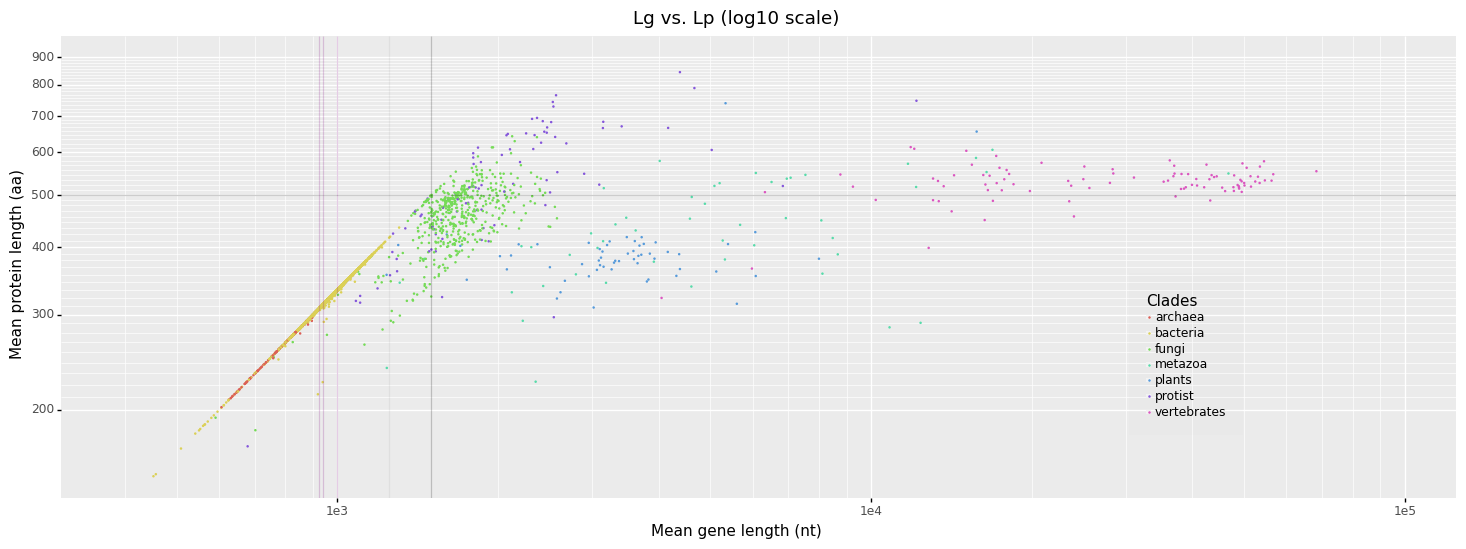

In [5]:
df2plot = merged
p_mu = (ggplot(df2plot, aes("genes_mean", "prots_mean", color="Clades")) + geom_point(size=0.01)
    + labs(title="Lg vs. Lp (log10 scale)", x="Mean gene length (nt)", y="Mean protein length (aa)")
    + geom_hline(yintercept = 500,  alpha=0.2) # add one horizonal line
    + geom_vline(xintercept = 1500, alpha=0.2) # add one vertical line
    + geom_vline(xintercept = 1250, alpha=0.05) # add one vertical line
    #
    + geom_vline(xintercept = 1000, alpha=0.2, color="purple") # final de proteobacterias
    + geom_vline(xintercept = 942,  alpha=0.2, color="purple") # ~pico de proteobacterias
    + geom_vline(xintercept = 925,  alpha=0.2, color="purple") # principio de proteobacterias
     
    + scale_x_log10(breaks=[10 ** power for power in range(2,6)],
                     #breaks=[100*x for x in range(5,100)],
                         #limits=[min(df2plot["genes_mean"].to_list())/2, 2*max(df2plot["genes_mean"].to_list())],
                    limits=[400,95000]
                    )
    + scale_y_log10(breaks = [100*x for x in range(2,10)],
                    # limits = [min(df2plot["prots_mean"].to_list())/2, 2*max(df2plot["prots_mean"].to_list())]
                    limits = [150,900]
                    ## limits = [300, 500]
                    )
    + theme(legend_position=(0.75,0.35), legend_key_size=2.5, legend_background=element_rect(fill='grey', alpha=0.01))
    + theme(figure_size=(18,6)) # preserve the scale of the units nt vs. 3*aa
    )
if 1:
    print(p_mu)  # for some reason, I have to print my plot

**Figure caption:** Each point represents, for one species, the mean of the distribution of the length of its genes versus the mean of the distribution of the length of its proteins. 
Mean protein coding gene length versus mean protein length. The black line describes the trend observed in these data, going from a regime in which the average size of the proteins grows proportionally to the average size of the genes, to another in which the size of the protein stabilizes and does not depend on gene length. Lc=(1550nt, 500aa).

## Variances of the length distributions: Vg vs. Vp (log10 scale)
Comment: This figure is not in the article

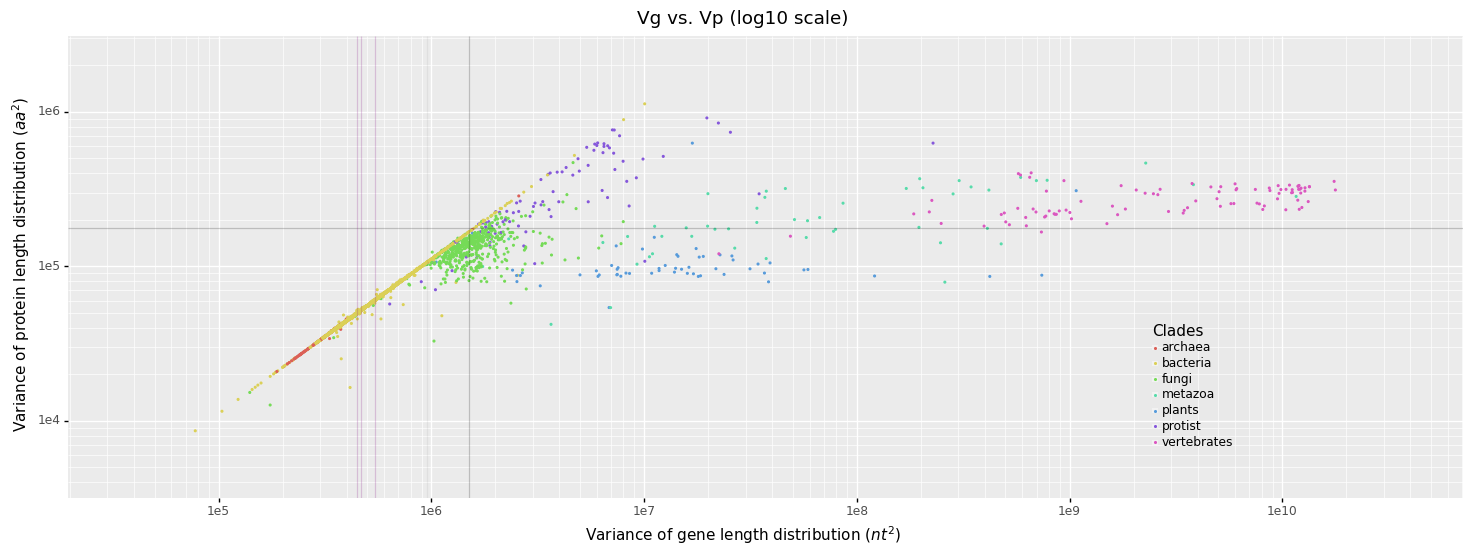

In [6]:
df2plot = merged
p_var = (ggplot(df2plot, aes("genes_var", "prots_var", color="Clades")) + geom_point(size=0.25)
     + labs(title="Vg vs. Vp (log10 scale)", x="Variance of gene length distribution ($nt^{2}$)", y="Variance of protein length distribution ($aa^{2}$)")
     + geom_hline(yintercept = v_aa_500, alpha=0.2) # add one horizonal line
     + geom_vline(xintercept = v_nt_1500, alpha=0.2) # add one vertical line
     + geom_vline(xintercept = v_nt_1250, alpha=0.05) # add one vertical line
     #
     + geom_vline(xintercept = v_nt_1000, alpha=0.2, color="purple") # final de proteobacterias
     + geom_vline(xintercept = v_nt_942, alpha=0.2,  color="purple") # ~pico de proteobacterias
     + geom_vline(xintercept = v_nt_925, alpha=0.2,  color="purple") # principio de proteobacterias
     + scale_x_log10(breaks=[10 ** power for power in range(13)],
                     limits=[min(df2plot["genes_var"].to_list())/2, 2*max(df2plot["genes_var"].to_list())]
                     )
     + scale_y_log10(breaks = [10**power for power in range(13)],
                     limits = [min(df2plot["prots_var"].to_list())/2, 2*max(df2plot["prots_var"].to_list())])
     + theme(legend_position=(0.75, 0.3), legend_key_size=3, legend_background=element_rect(fill='grey', alpha=0.01))
     + theme(figure_size=(18,6)) # preserve the scale of the units  (nt)^2 = (3*aa)^2
    )
if 1:
    print(p_var)  # for some reason, I have to print my plot

**Figure caption:** Each point represents, for one species, the variance of the distribution of the length of its genes versus the variance of the distribution of the length of its proteins. 